In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns

from ete3 import NCBITaxa
from Bio import SeqIO
import taxoniq
import marisa_trie

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

In [3]:
# INPUT FILES
#this_iteration = 'db_compression_-_nt_06_-_2023-09-15-nt-only-0-6_1060'
#this_iteration = 'NCBI_DB_Compression-NT_0-5_scaled1000-NR_scaled1000'
#this_iteration = 'NCBI_DB_Compression-NT_0-5_scaled1000-NR_scaled1000_RUN_SEPT25' # good for NT and NR 
this_iteration = 'db_compression_-_nt_06_-_2023-09-15-nt-only-0-6_1060'
#this_iteration = 'NCBI DB Compression-2023-09-15-nt-0-7-nr-0-7-scaled-100'

manifest = {
            'norg_13': {'old': "norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10__27091_taxon_report.csv", 'new': "norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10__report.csv"},
            'nycsm': {'old': "UnAmbiguouslyMapped_ds.nycsm_27095_taxon_report.csv", 'new': "UnAmbiguouslyMapped_ds.nycsm_report.csv"},
            'soil': {'old': "UnAmbiguouslyMapped_ds.soil_27094_taxon_report.csv", 'new': "UnAmbiguouslyMapped_ds.soil_report.csv"},
            'atcc_even': {'old': "atcc_even_27093_taxon_report.csv", 'new': "atcc_even_report.csv"},
            'atcc_staggered': {'old': "atcc_staggered_27092_taxon_report.csv", 'new': "atcc_staggered_report.csv"},
            'ds7': {'old': "UnAmbiguouslyMapped_ds.7_27101_taxon_report.csv", 'new': "UnAmbiguouslyMapped_ds.7_report.csv"},
            'buccal': {'old': "UnAmbiguouslyMapped_ds.buccal_27100_taxon_report.csv", 'new': "UnAmbiguouslyMapped_ds.buccal_report.csv"},
            'gut': {'old': "UnAmbiguouslyMapped_ds.gut_27098_taxon_report.csv", 'new': "UnAmbiguouslyMapped_ds.gut_report.csv"},
            'hous1': {'old': "UnAmbiguouslyMapped_ds.hous1_27097_taxon_report.csv", 'new': "UnAmbiguouslyMapped_ds.hous1_report.csv"},
            'hous2': {'old': "UnAmbiguouslyMapped_ds.hous2_27096_taxon_report.csv", 'new': "UnAmbiguouslyMapped_ds.hous2_report.csv"},
            'cityparks': {'old': "UnAmbiguouslyMapped_ds.cityparks_27099_taxon_report.csv", 'new': "UnAmbiguouslyMapped_ds.cityparks_report.csv"}
        }

metadata_manifest = {
    'nt_nr_2021_01_22_compressed_0.7_scaled_1000.09_25_23': {'nr': 'nr-0.7-1000'},
    'nt_nr_2021_01_22_compressed_0.6_scaled_1000.09_25_23': {'nr': 'nr-0.6-1000'},
    '2023-09-15-nt-0.7-nr-0.7-scaled-100': {'nt': 'nt-0.7-1000', 'nr': 'nr-0.7-100'},
    '2023-09-15-nt-0.6-nr-0.6-scaled-100': {'nt': 'nt-0.6-1000', 'nr': 'nr-0.6-100'},
    'nt_2021_01_22_compressed_0.5_protein_scaled_1000': {'nt': 'nt-0.5-1000', 'nr': 'nr-0.5-1000'}
}

aggregate_metrics_dict = {}

for this_iteration in metadata_manifest.keys():
    
    for db in metadata_manifest[this_iteration].keys(): #['nt', 'nr']:

        print(this_iteration)
        print(db)
        aggregate_metrics_dict[metadata_manifest[this_iteration][db]] = {}
        
        current_db = db

        prefix_old = "./data/BASELINE/"
        prefix_new = "./data/NEW/" + this_iteration + "/"

        final_metrics_dict = {}
        for i in manifest.keys():

            print(manifest[i]["old"])

            old_taxon_counts = prefix_old + manifest[i]["old"]
            new_taxon_counts = prefix_new + manifest[i]["new"]

            final_metrics_dict[i] = generate_metrics(old_taxon_counts, new_taxon_counts, current_db, show_plots = False)

        final_metrics_df = pd.DataFrame.from_dict(final_metrics_dict, orient='index')
        final_metrics_df
        
        aggregate_metrics_dict[metadata_manifest[this_iteration][db]] = final_metrics_df
        
aggregate_metrics_dict

nt_nr_2021_01_22_compressed_0.7_scaled_1000.09_25_23
nr
norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10__27091_taxon_report.csv
UnAmbiguouslyMapped_ds.nycsm_27095_taxon_report.csv
UnAmbiguouslyMapped_ds.soil_27094_taxon_report.csv
atcc_even_27093_taxon_report.csv
atcc_staggered_27092_taxon_report.csv
UnAmbiguouslyMapped_ds.7_27101_taxon_report.csv


/Users/katrina.kalantar/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


UnAmbiguouslyMapped_ds.buccal_27100_taxon_report.csv
UnAmbiguouslyMapped_ds.gut_27098_taxon_report.csv
UnAmbiguouslyMapped_ds.hous1_27097_taxon_report.csv
UnAmbiguouslyMapped_ds.hous2_27096_taxon_report.csv
UnAmbiguouslyMapped_ds.cityparks_27099_taxon_report.csv
nt_nr_2021_01_22_compressed_0.6_scaled_1000.09_25_23
nr
norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10__27091_taxon_report.csv
UnAmbiguouslyMapped_ds.nycsm_27095_taxon_report.csv
UnAmbiguouslyMapped_ds.soil_27094_taxon_report.csv
atcc_even_27093_taxon_report.csv
atcc_staggered_27092_taxon_report.csv
UnAmbiguouslyMapped_ds.7_27101_taxon_report.csv
UnAmbiguouslyMapped_ds.buccal_27100_taxon_report.csv
UnAmbiguouslyMapped_ds.gut_27098_taxon_report.csv
UnAmbiguouslyMapped_ds.hous1_27097_taxon_report.csv
UnAmbiguouslyMapped_ds.hous2_27096_taxon_report.csv
UnAmbiguouslyMapped_ds.cityparks_27099_taxon_report.csv
2023-09-15-nt-0.7-nr-0.7-scaled-100
nt
norg_13__nacc_35__uniform_weight_per_organism__hiseq_reads__v10__2709

{'nr-0.7-1000':                 sc_total  pc_total  new_taxon_count  old_taxon_count  \
 norg_13              1.0       1.0              484              482   
 nycsm                1.0       1.0             1892             1847   
 soil                 1.0       1.0             5577             5507   
 atcc_even            0.0       0.0             1307              980   
 atcc_staggered       0.0       0.0             1028              855   
 ds7                  1.0       1.0             9969             9949   
 buccal               1.0       1.0              433              379   
 gut                  1.0       1.0             1217             1141   
 hous1                1.0       1.0             2555             2507   
 hous2                1.0       1.0             1067             1015   
 cityparks            1.0       1.0             5268             5209   
 
                 percent_increase  
 norg_13                     0.41  
 nycsm                       2.44  

In [2]:
def generate_metrics(old_taxon_counts, new_taxon_counts, current_db, show_plots = True):
    old_df = pd.read_csv(old_taxon_counts)
    new_df = pd.read_csv(new_taxon_counts)

    #old_df.head()
    #new_df.head()
    
    old_df = old_df[old_df.tax_level == 1][['tax_id', 'name', 'nt_rpm', 'nt_contigs', 'nr_rpm']]
    new_df = new_df[new_df.tax_level == 1][['tax_id', 'name', 'nt_rpm', 'nt_contigs', 'nr_rpm']]
  
    full_df = pd.merge(left = old_df, right = new_df, how='outer', on='tax_id', suffixes = ['_old', '_new'])
    
    full_df.dropna(subset=[(current_db+'_rpm_old'), (current_db+'_rpm_new')], how='all', inplace=True)
    full_df['log_'+current_db+'_rpm_old'] = np.log(full_df[current_db+'_rpm_old'] + 1)
    full_df['log_'+current_db+'_rpm_new'] = np.log(full_df[current_db+'_rpm_new'] + 1)

    full_df.sort_values(by=current_db+'_rpm_old', ascending = False, inplace=True)
    
    full_df.fillna(0, inplace=True)
    full_df['diff'] = full_df[current_db+'_rpm_old'] - full_df[current_db+'_rpm_new']
    full_df['max_' + current_db + '_rpm'] = full_df[[current_db+'_rpm_old', current_db+'_rpm_new']].max(axis=1)
    full_df['perc_diff'] = full_df['diff']/full_df['max_' + current_db+ '_rpm']

    full_df.sort_values(by='diff', inplace=True)
    top_diffs = full_df.head(5)
    bottom_diffs = full_df.tail(5)
    
    if(show_plots):
        full_df.plot(kind='scatter', x = current_db + '_rpm_old', y = current_db+'_rpm_new', alpha = .5, figsize=(5,5))
        plt.title(old_taxon_counts.split('/')[-1])
        for i in top_diffs.index:
            plt.text(x = top_diffs.loc[i][current_db +'_rpm_old'], y = top_diffs.loc[i][current_db + '_rpm_new'], s = top_diffs.loc[i]['name_new'], color='red') #'fixed_name'
        for i in bottom_diffs.index:
            plt.text(x = bottom_diffs.loc[i][current_db + '_rpm_old'], y = bottom_diffs.loc[i][current_db + '_rpm_new'], s = bottom_diffs.loc[i]['name_old'], color = 'blue')#, rotation=90)

        patches = [mpatches.Patch(color='red', label='top diffs'), mpatches.Patch(color='blue', label='bottom diffs')]
        plt.legend(handles=patches, loc='lower right', bbox_to_anchor=(1.4, .1))
        plt.show()

        full_df.plot(kind='scatter', x = 'log_' +  current_db +'_rpm_old', y = 'log_' + current_db + '_rpm_new', alpha = .5, figsize=(5,5))
        plt.title(old_taxon_counts.split('/')[-1])
        for i in top_diffs.index:
            plt.text(x = top_diffs.loc[i]['log_' + current_db + '_rpm_old'], y = top_diffs.loc[i]['log_' +  current_db+ '_rpm_new'], s = top_diffs.loc[i]['name_new'], color='red') #'fixed_name'
        for i in bottom_diffs.index:
            plt.text(x = bottom_diffs.loc[i]['log_' + current_db + '_rpm_old'], y = bottom_diffs.loc[i]['log_' + current_db + '_rpm_new'], s = bottom_diffs.loc[i]['name_old'], color='blue')

        plt.legend(handles=patches, loc='lower right', bbox_to_anchor=(1.4, .1))
        plt.show()
    
    
    #print(top_diffs.head())
    #print(bottom_diffs.head())
    
    new_organisms_df = full_df[full_df.nt_rpm_old == 0]
    new_organisms_df.sort_values(by=current_db + '_rpm_new', ascending = False, inplace=True)
    #print(new_organisms_df.head())
    
    #overall correlation!
    sc_total = np.round((stats.spearmanr(full_df[current_db + '_rpm_old'], full_df[current_db + '_rpm_new']))[0])
    pc_total = np.round((stats.pearsonr(full_df[current_db + '_rpm_old'], full_df[current_db + '_rpm_new']))[0])
    
    # correlation when removing the taxa that are new low-abundance hits -- this is higher, means that the doubling of "new taxa" (false-positives) is driving some of the spearman deviation
    full_df2 = full_df[full_df.nt_rpm_old != 0]
    sc_top =np.round((stats.spearmanr(full_df2[current_db + '_rpm_old'], full_df2[current_db + '_rpm_new']))[0])
    pc_top =np.round((stats.pearsonr(full_df2[current_db + '_rpm_old'], full_df2[current_db + '_rpm_new']))[0])
    
    res = {}
    for i in [0, 10, 100, 1000]:
        res[str(i)] = {}
        res[str(i)]['new'] = (full_df[current_db + '_rpm_new'] > i).sum()
        res[str(i)]['old'] = (full_df[current_db + '_rpm_old'] > i).sum()

        #if i == 0:
        #print("% increase in total taxa")
        #print((res[str(i)]['new']-res[str(i)]['old'])/res[str(i)]['old'])
    res_df = pd.DataFrame.from_dict(res, orient='index')
    #print(res_df)

    if(show_plots):
        res_df.plot.bar()
        plt.title("Total Count of Hits, rPM > Threshold")
        plt.show()

    new_taxon_count = res['0']['new']
    old_taxon_count = res['0']['old']
    percent_increase = np.round(((new_taxon_count - old_taxon_count)/old_taxon_count)*100, 2)
    
    return({'sc_total': sc_total, 
           'pc_total': sc_total, 
           #'sc_top': sc_top, 
           #'pc_top': pc_top, 
           'new_taxon_count': new_taxon_count, 
           'old_taxon_count': old_taxon_count, 
           'percent_increase': percent_increase})

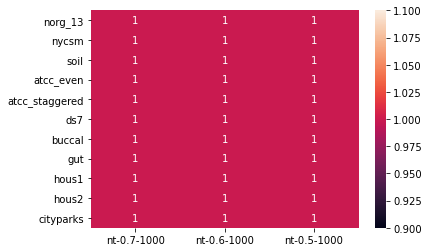

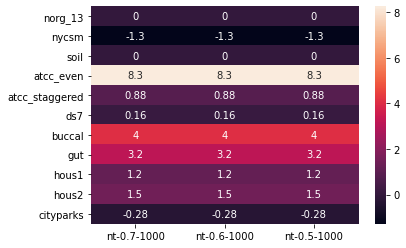

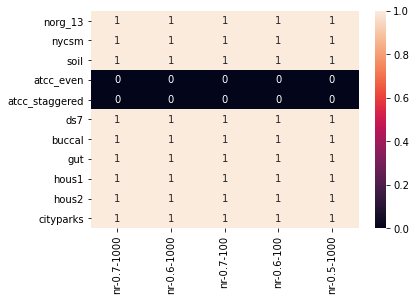

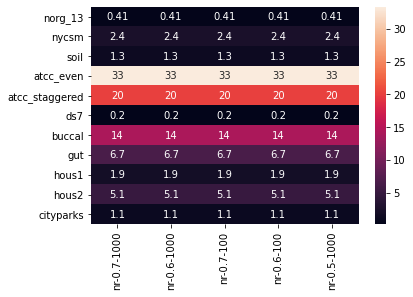

In [18]:

def plot_heatmap(input_df):
    sns.heatmap(input_df, annot=True)
    plt.show()

# plot nt correlation as heatmap
nt_corr_heatmap_data = {}
for i in aggregate_metrics_dict.keys():
    if 'nt' in i:
        nt_corr_heatmap_data[i] = dict(aggregate_metrics_dict[i]['sc_total'])
        
nt_corr_df = pd.DataFrame.from_dict(nt_corr_heatmap_data)
plot_heatmap(nt_corr_df)


# plot nt pct_inc as heatmap
nt_pctinc_heatmap_data = {}
for i in aggregate_metrics_dict.keys():
    if 'nt' in i:
        nt_pctinc_heatmap_data[i] = dict(aggregate_metrics_dict[i]['percent_increase'])
        
nt_pctinc_df = pd.DataFrame.from_dict(nt_pctinc_heatmap_data)

plot_heatmap(nt_pctinc_df)



# plot nr correlation as heatmap
nr_corr_heatmap_data = {}
for i in aggregate_metrics_dict.keys():
    if 'nr' in i:
        nr_corr_heatmap_data[i] = dict(aggregate_metrics_dict[i]['sc_total'])
        
nr_corr_df = pd.DataFrame.from_dict(nr_corr_heatmap_data)
nr_corr_df
plot_heatmap(nr_corr_df)

# plot nr pct_inc as heatmap
nr_pctinc_heatmap_data = {}
for i in aggregate_metrics_dict.keys():
    if 'nr' in i:
        nr_pctinc_heatmap_data[i] = dict(aggregate_metrics_dict[i]['percent_increase'])
        
nr_pctinc_df = pd.DataFrame.from_dict(nr_pctinc_heatmap_data)
plot_heatmap(nr_pctinc_df)